In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

file_path = "/Users/sziwia/Documents/projekty health/seizure-risk-analysis/data/processed/features.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")
print(f"Seizure samples in test set: {y_test.sum()}")

Training samples: 4131 | Test samples: 1771
Seizure samples in test set: 11


In [5]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()

model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=ratio,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


<Figure size 1000x800 with 0 Axes>

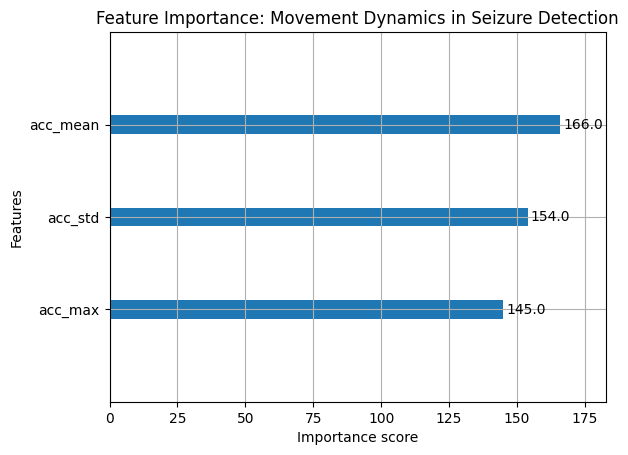

In [6]:
import os
import matplotlib.pyplot as plt
from xgboost import plot_importance

model_dir = "/Users/sziwia/Documents/projekty health/seizure-risk-analysis/models"
os.makedirs(model_dir, exist_ok=True)
model.save_model(f"{model_dir}/seizure_detector_v1.json")

plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight')
plt.title("Feature Importance: Movement Dynamics in Seizure Detection")
plt.savefig(f"{model_dir}/feature_importance.png")
plt.show()

In [8]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("Final Model Summary")
print("-" * 20)
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

Final Model Summary
--------------------
Balanced Accuracy: 0.7611

Confusion Matrix:
[[1719   41]
 [   5    6]]

Detailed Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1760
           1       0.13      0.55      0.21        11

    accuracy                           0.97      1771
   macro avg       0.56      0.76      0.60      1771
weighted avg       0.99      0.97      0.98      1771



<Figure size 1000x800 with 0 Axes>

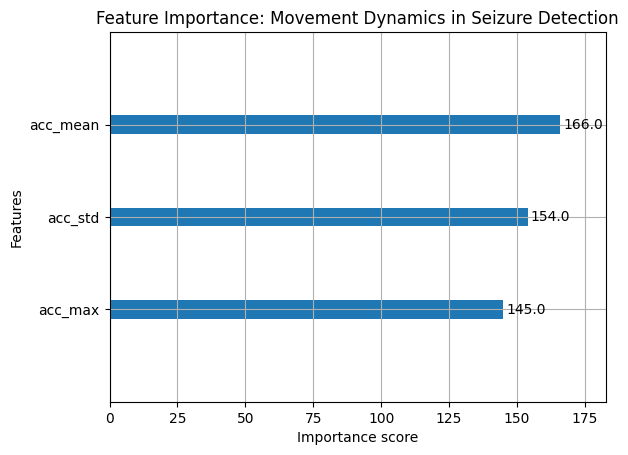

In [10]:
import os
import matplotlib.pyplot as plt

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight')
plt.title("Feature Importance: Movement Dynamics in Seizure Detection")

plt.savefig(f"{model_dir}/feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

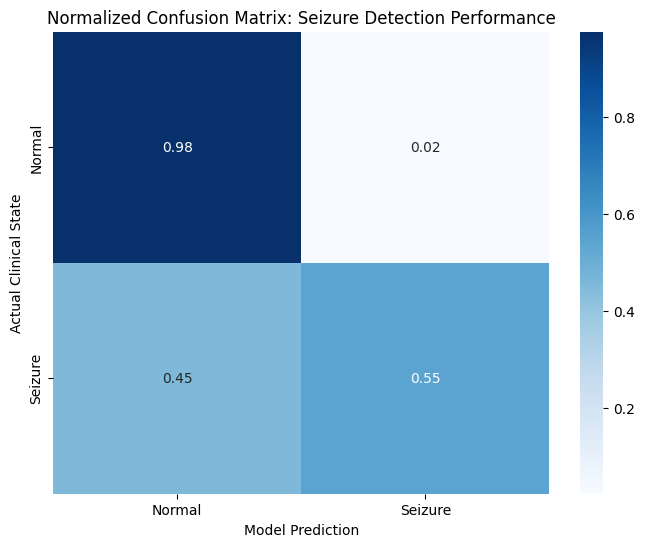

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=['Normal', 'Seizure'], 
            yticklabels=['Normal', 'Seizure'])
plt.title("Normalized Confusion Matrix: Seizure Detection Performance")
plt.ylabel("Actual Clinical State")
plt.xlabel("Model Prediction")

plt.savefig(f"{model_dir}/confusion_matrix_normalized.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
final_save_path = "/Users/sziwia/Documents/projekty health/seizure-risk-analysis/models/confusion_matrix_normalized.png"
plt.savefig(final_save_path, dpi=300, bbox_inches='tight')
print(f"File saved at: {final_save_path}")

File saved at: /Users/sziwia/Documents/projekty health/seizure-risk-analysis/models/confusion_matrix_normalized.png


<Figure size 640x480 with 0 Axes>